In [25]:
#Import tensorflow
import tensorflow as tf

In [26]:
#To print the version
print(tf.__version__)

2.9.1


In [27]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Importing the dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
#To check the shape of the dataset:
df.shape

(10000, 14)

In [30]:
#To check the columns datatypes:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [31]:
#To check the five point summary:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [32]:
#To check the summary for categorical features:
df.describe(include=np.object_)

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [33]:
#To find the categorical columns in the dataset:
cat_col = df.select_dtypes(include = np.object_)
cat_col.head()

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [34]:
#To check the value counts under categorical cols:
for i in cat_col:
    print(cat_col[i].value_counts())

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64


In [35]:
#Split the data into dependent and independent columns:
X = df.iloc[:, 3:13]
y = df.iloc[:, 13]

In [36]:
#Create dummy variables
dummy = pd.get_dummies(X[["Geography","Gender"]],drop_first=True)

In [37]:
## Concatenate the Data Frames
X=pd.concat([X,dummy],axis=1)



In [38]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [39]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [40]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [41]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [42]:
#Import the required libraries to build a ANN Model:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [43]:
# Initialising the ANN
classifier = Sequential()

In [44]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [45]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [46]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=1,activation='relu'))

In [47]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=50)

Epoch 1/50
536/536 [==============================] - 3s 4ms/step - loss: 2.3211 - accuracy: 0.7194 - val_loss: 1.5070 - val_accuracy: 0.7709
Epoch 2/50
536/536 [==============================] - 2s 3ms/step - loss: 1.0703 - accuracy: 0.7660 - val_loss: 0.6484 - val_accuracy: 0.7827
Epoch 3/50
536/536 [==============================] - 2s 3ms/step - loss: 0.6006 - accuracy: 0.7847 - val_loss: 0.5883 - val_accuracy: 0.8008
Epoch 4/50
536/536 [==============================] - 2s 3ms/step - loss: 0.5295 - accuracy: 0.7990 - val_loss: 0.5905 - val_accuracy: 0.8129
Epoch 5/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4871 - accuracy: 0.8054 - val_loss: 0.4951 - val_accuracy: 0.8152
Epoch 6/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4660 - accuracy: 0.8186 - val_loss: 0.5310 - val_accuracy: 0.8236
Epoch 7/50
536/536 [==============================] - 2s 3ms/step - loss: 0.4542 - accuracy: 0.8212 - val_loss: 0.4525 - val_accuracy: 0.8198
Epoch 

In [49]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


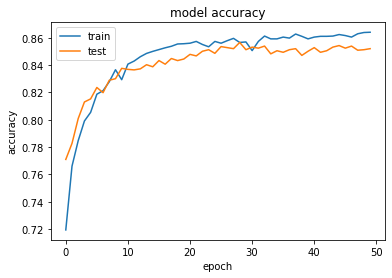

In [50]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

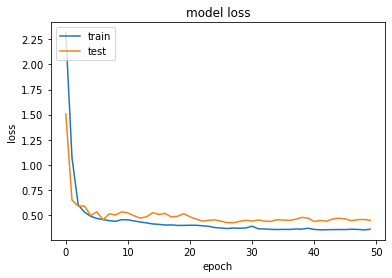

In [51]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [52]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [53]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1506,   72],
       [ 232,  190]], dtype=int64)

In [54]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [55]:
score

0.848